# La matriz Laplaciana

Importamos las librerías a utilizar

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

## Ejemplo 1

Construyamos la red y visualicemos

In [2]:
G1 = nx.Graph()

In [3]:
for i in range(9):
    G1.add_node(i)
    
G1.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8))

In [4]:
edges=[(0,1),(1,2),(2,3),(3,1),(3,0),(4,5),(5,6),(6,4),(7,8)]
G1.add_edges_from(edges)

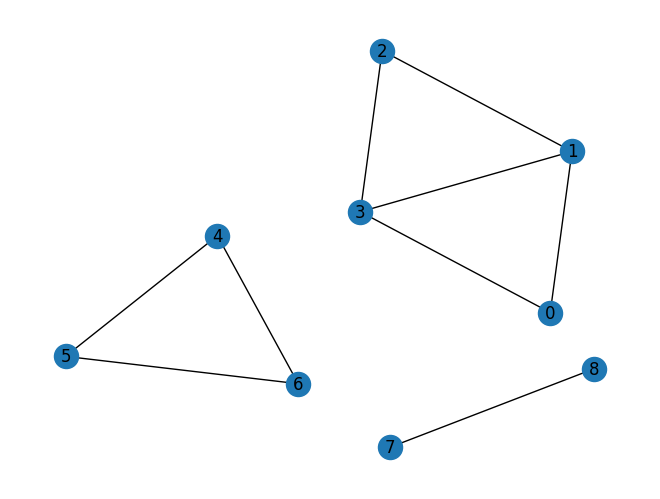

In [5]:
layout=nx.kamada_kawai_layout(G1)
nx.draw(G1,layout, with_labels=True)

En NetworkX se puede obtener la matriz Laplaciana con la función "laplacian_matriz". Devuelve una lista de los valores de las entradas de la matriz. Podemos usar "toarray" para convertirla en un arreglo matricial.

In [6]:
L1=nx.laplacian_matrix(G1)
print(L1.toarray())

[[ 2 -1  0 -1  0  0  0  0  0]
 [-1  3 -1 -1  0  0  0  0  0]
 [ 0 -1  2 -1  0  0  0  0  0]
 [-1 -1 -1  3  0  0  0  0  0]
 [ 0  0  0  0  2 -1 -1  0  0]
 [ 0  0  0  0 -1  2 -1  0  0]
 [ 0  0  0  0 -1 -1  2  0  0]
 [ 0  0  0  0  0  0  0  1 -1]
 [ 0  0  0  0  0  0  0 -1  1]]


Notemos que quedan tres bloques bloques en la diagonal... (y la red tiene tres componentes)

Podemos obtener los eigenvalores y los eigenvectores de la Laplaciana usando la función "linalg.eig" de numpy, nos proporciona dos listas, una de eigenvalores y otra de eigenvectores:

In [7]:
eigenvalores, eigenvectores=np.linalg.eig(L1.toarray())

Podemos obtener la lista de eigenvalores y de eigenvectores respectivos:

In [8]:
eigenvalores

array([-2.22044605e-16,  2.00000000e+00,  4.00000000e+00,  4.00000000e+00,
        3.00000000e+00, -4.44089210e-16,  3.00000000e+00,  2.00000000e+00,
        0.00000000e+00])

In [9]:
eigenvectores

array([[ 5.00000000e-01,  7.07106781e-01, -5.00000000e-01,
         1.43734430e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.00000000e-01, -9.75163584e-17,  5.00000000e-01,
        -8.20994223e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.00000000e-01, -7.07106781e-01, -5.00000000e-01,
         1.43734430e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.00000000e-01,  1.03688800e-16,  5.00000000e-01,
         5.33525363e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  8.16496581e-01, -5.77350269e-01,
         2.53594812e-01,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -4.08248290e-01, -5.773502

Notemos que hay eigenvalores "negativos", pero la teoría dice que todos son no negativos. ¿Por qué? Se utiliza un algoritmo de aproximación de eigenvalores (y eigenvectores) ya que obtener las raíces del polinomio característico es altamente complejo. Los eigenvalores "negativos" corresponden al eigenvalor cero. Entonces el cero es un eigenvalor con multiplicidad tres (igual que el número de componentes de la red...)

No es necesario usar numpy para obtener los eigenvalores, se puede usar la función "laplacian_spectrum" de NetworkX:

In [10]:
nx.laplacian_spectrum(G1)

array([-7.96238075e-16, -1.11022302e-16,  0.00000000e+00,  2.00000000e+00,
        2.00000000e+00,  3.00000000e+00,  3.00000000e+00,  4.00000000e+00,
        4.00000000e+00])

Los eigenvalores aparecen ordenados de forma no decreciente. Nuevamente tenemos eigenvalores "negativos". Por la misma razón, corresponden al eigenvalor cero.

## Ejemplo 2

Construyamos la segunda red:

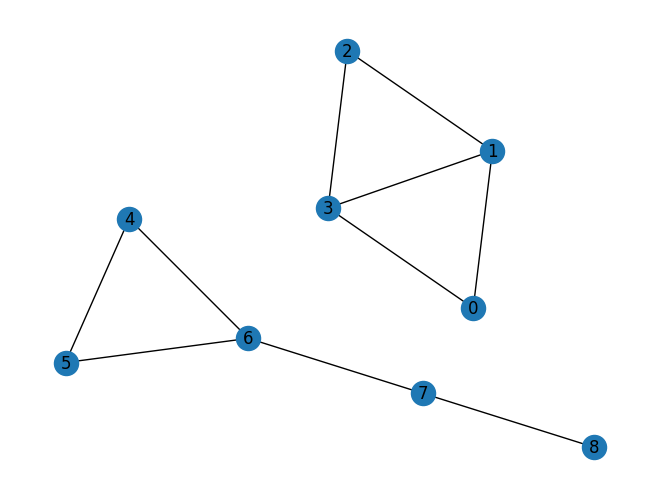

In [11]:
G2=nx.Graph()

for i in range(9):
    G2.add_node(i)

edges=[(0,1),(1,2),(2,3),(3,1),(3,0),(4,5),(5,6),(6,4),(7,8),(6,7)]
G2.add_edges_from(edges)
layout=nx.kamada_kawai_layout(G2)
nx.draw(G2,layout, with_labels=True)

Visualicemos su matriz Laplaciana:

In [12]:
L2=nx.laplacian_matrix(G2)
print(L2.toarray())

[[ 2 -1  0 -1  0  0  0  0  0]
 [-1  3 -1 -1  0  0  0  0  0]
 [ 0 -1  2 -1  0  0  0  0  0]
 [-1 -1 -1  3  0  0  0  0  0]
 [ 0  0  0  0  2 -1 -1  0  0]
 [ 0  0  0  0 -1  2 -1  0  0]
 [ 0  0  0  0 -1 -1  3 -1  0]
 [ 0  0  0  0  0  0 -1  2 -1]
 [ 0  0  0  0  0  0  0 -1  1]]


Notemos que tenemos dos bloques en la diagonal... (y la red tiene dos componentes)

Vamos el espectro:

In [13]:
nx.laplacian_spectrum(G2)

array([-7.96238075e-16,  4.78783679e-16,  5.18805696e-01,  2.00000000e+00,
        2.31110782e+00,  3.00000000e+00,  4.00000000e+00,  4.00000000e+00,
        4.17008649e+00])

Tenemos dos eigenvalores que son (aproximaciones a) cero (igual que el número de componentes).

## Ejemplo 3:

Construyamos y visualicemos la tercera red:

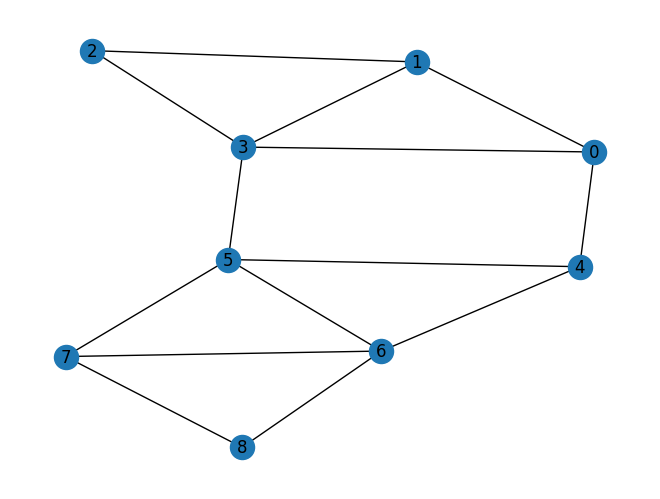

In [14]:
G3=nx.Graph()

for i in range(9):
    G3.add_node(i)

edges=[(0,1),(1,2),(2,3),(3,1),(3,0),(4,5),(5,6),(6,4),(7,8),(6,7),(0,4),(3,5),(5,7),(6,8)]
G3.add_edges_from(edges)
layout=nx.kamada_kawai_layout(G3)
nx.draw(G3,layout, with_labels=True)

Notemos que la red es conexa. Visualicemos su matriz Laplaciana:

In [15]:
L3=nx.laplacian_matrix(G3)
print(L3.toarray())

[[ 3 -1  0 -1 -1  0  0  0  0]
 [-1  3 -1 -1  0  0  0  0  0]
 [ 0 -1  2 -1  0  0  0  0  0]
 [-1 -1 -1  4  0 -1  0  0  0]
 [-1  0  0  0  3 -1 -1  0  0]
 [ 0  0  0 -1 -1  4 -1 -1  0]
 [ 0  0  0  0 -1 -1  4 -1 -1]
 [ 0  0  0  0  0 -1 -1  3 -1]
 [ 0  0  0  0  0  0 -1 -1  2]]


No tenemos bloques ajenos en la diagonal, o bien, tenemos un solo bloque... (y la red tiene una sola componente).

Veamos su espectro:

In [16]:
nx.laplacian_spectrum(G3)

array([6.59194921e-16, 5.40472459e-01, 1.80647291e+00, 2.70503710e+00,
       3.34296213e+00, 4.23364767e+00, 4.29496290e+00, 5.19352709e+00,
       5.88291774e+00])

Vemos que solamente el primer eigenvalor es una aproximación a cero, por lo que tiene multiplicidad uno (como el número de componentes de la red).

## Ejemplo 4

Construyamos y visualicemos la cuarta red

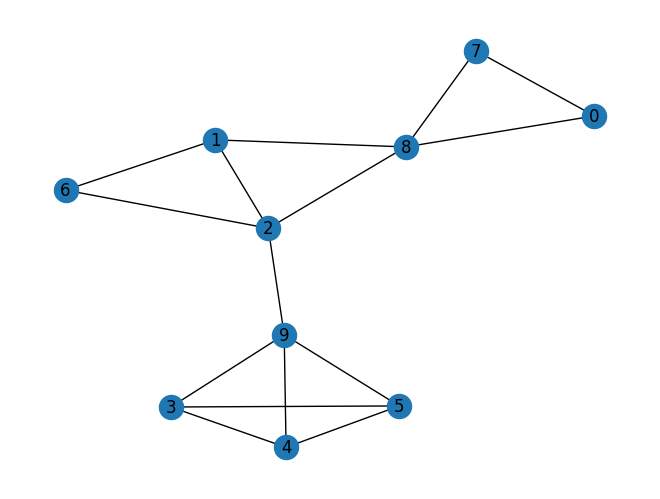

In [17]:
G4=nx.Graph()

for i in range(10):
    G3.add_node(i)

edges=[(0,8),(0,7),(7,8),(1,8),(2,8),(1,2),(1,6),(2,6),(2,9),(9,3),(3,4),(3,5),(4,5),(4,9),(9,5)]
G4.add_edges_from(edges)
layout=nx.kamada_kawai_layout(G4)
nx.draw(G4,layout, with_labels=True)

Notemos que es una red conexa. Visualicemos su Laplaciana:

In [18]:
L4=nx.laplacian_matrix(G4)
print(L4.toarray())

[[ 2 -1 -1  0  0  0  0  0  0  0]
 [-1  4 -1 -1 -1  0  0  0  0  0]
 [-1 -1  2  0  0  0  0  0  0  0]
 [ 0 -1  0  3 -1 -1  0  0  0  0]
 [ 0 -1  0 -1  4 -1 -1  0  0  0]
 [ 0  0  0 -1 -1  2  0  0  0  0]
 [ 0  0  0  0 -1  0  4 -1 -1 -1]
 [ 0  0  0  0  0  0 -1  3 -1 -1]
 [ 0  0  0  0  0  0 -1 -1  3 -1]
 [ 0  0  0  0  0  0 -1 -1 -1  3]]


Al igual que el anterior ejemplo, tenemos un solo bloque (y la red tiene una sola componente).

Veamos su espectro:

In [19]:
nx.laplacian_spectrum(G4)

array([3.68086631e-16, 2.60171357e-01, 8.63783964e-01, 3.00000000e+00,
       3.06068731e+00, 4.00000000e+00, 4.00000000e+00, 4.00000000e+00,
       5.00000000e+00, 5.81535737e+00])

Notemos que el cero es un eigenvalor con multiplicidad 1 (igual que el número de componentes).